In [3]:
import numpy as np 
from collections import Counter

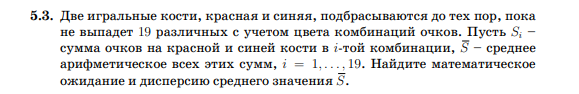

In [4]:
combinations = 19
k = [i for i in range(1,7)]
X_k = [1/6] * 6
X_k_forexample = ['1/6'] * 6

#### Объём генеральной совокупности

In [6]:
N = len(X_k)**2
N

36

#### Распределение вероятностей на синей и красной костях

In [19]:
distr = dict(zip(k, X_k))
distr_ex = dict(zip(k,X_k_forexample))
for value in distr:
    print(value,' ', distr_ex[value])

1   1/6
2   1/6
3   1/6
4   1/6
5   1/6
6   1/6


#### Генеральное среднее для синей и красной костей (т.к. ф.р. совпадают)

In [24]:
gen_mean_red = 0
for value in distr:
    gen_mean_red += (value) * distr[value]
gen_mean = np.round(gen_mean_red / N,3)
gen_mean_blue = gen_mean_red
gen_mean_blue, gen_mean_red

(3.5, 3.5)

#### Генеральная дисперсия для синей и красной костей (т.к. ф.р. совпадают)

In [34]:
gen_D_red = 0
for value in distr:
    gen_D_red += (value)**2 * distr[value]
gen_var_red = gen_var_blue = np.round((gen_D_red - (gen_mean_red)**2),3)
gen_var_red, gen_var_blue

(2.917, 2.917)

#### Так как это независимые с.в. => E суммы = Сумма E[i], Var суммы = Сумма Var[i]

#### Математическое ожидание среднего значения среднего арифметического сумм

In [37]:
E = gen_mean_blue + gen_mean_red
E

7.0

#### Дисперсия среднего значения среднего арифметического сумм (в случае бесповторной выборки)

In [50]:
D = 0
sum_of_gen_var = gen_var_red+gen_var_blue
for value in distr:
    D += (value)**2 * distr[value]
gen_var = round(((sum_of_gen_var)/(combinations) * ((N*N - combinations) / (N*N - 1))),5)
gen_var

0.14914

In [8]:
N = 100000
result = []
for i in range(N):
    list_rand = []
    X_k = [i for i in range(1,7)]
    Y_k = [i for i in range(1,7)]
    while len(list_rand) < 19:
        x = np.random.choice(X_k)
        y = np.random.choice(Y_k)
        if [x,y] in list_rand:
            continue
        else:
            list_rand.append([x,y])
    for j in range(len(list_rand)):
        list_rand[j] = list_rand[j][0] + list_rand[j][1]
    result.append(np.mean(list_rand))

print(f' E(X_mean) = {round(np.mean(result),5)}')
print(f' Var = {round(np.var(result),5)}')

 E(X_mean) = 7.00012
 Var = 0.14913
